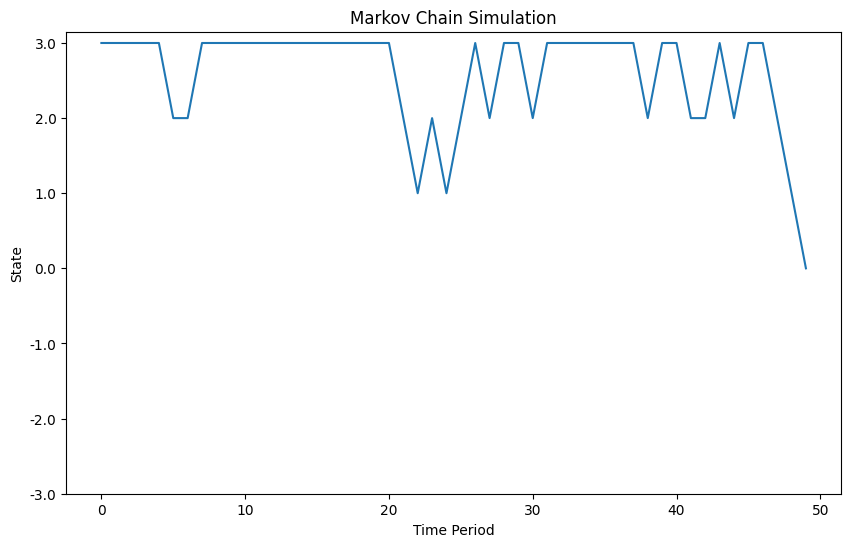

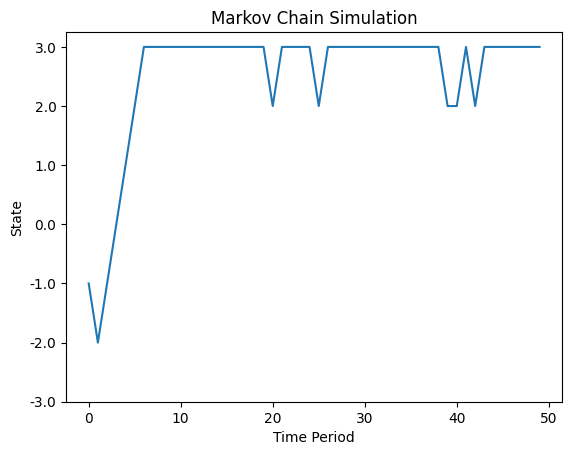

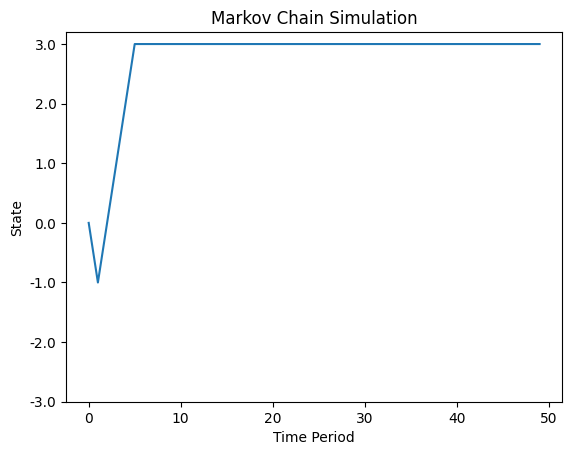

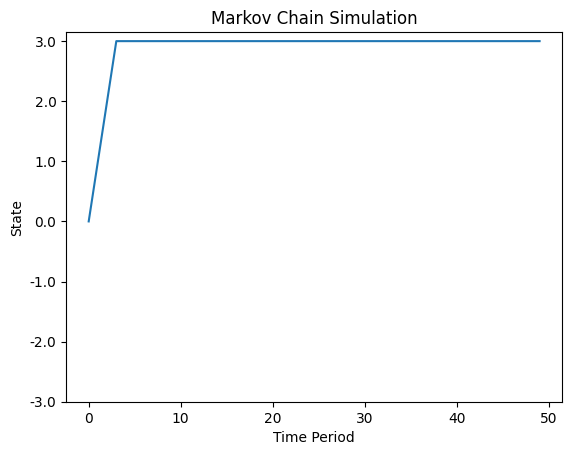

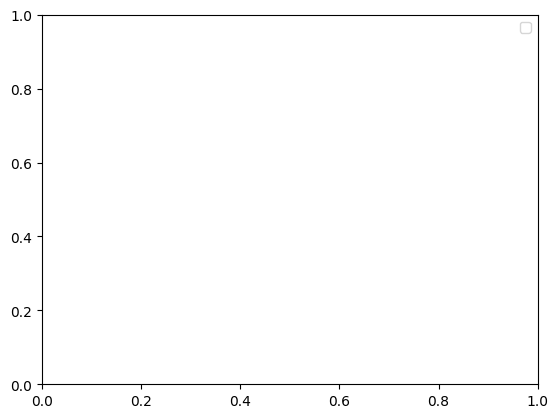

In [8]:
#question3b,c,d
import numpy as np
import matplotlib.pyplot as plt
#3b
def rouwenhorst(gamma, N, sigma=1):
    p = np.zeros((N, N))
    x = np.linspace(-3*sigma, 3*sigma, N)
    p[0, 0] = (1 + gamma) / 2
    p[0, 1] = (1 - gamma) / 2
    p[N-1, N-2] = (1 - gamma) / 2
    p[N-1, N-1] = (1 + gamma) / 2

    for i in range(1, N-1):
        p[i, i-1] = (1 - gamma) / 2
        p[i, i] = 1 - gamma
        p[i, i+1] = (1 + gamma) / 2
    p = p / p.sum(axis=1)[:, None]

    return p, x
#3c
def simulate_markov_chain(transition_matrix, initial_state, periods):
    states = [initial_state]
    for _ in range(periods-1):
        next_state = np.random.choice(len(transition_matrix), p=transition_matrix[states[-1]])
        states.append(next_state)
    return np.array(states)

def plot_simulation(simulated_states, state_vector):
    plt.plot(simulated_states)
    plt.yticks(range(len(state_vector)), state_vector)
    plt.xlabel('Time Period')
    plt.ylabel('State')
    plt.title('Markov Chain Simulation')
    plt.show()
#3d
gamma_values = [0.75, 0.85, 0.95, 0.99]
N = 7
periods = 50
plt.figure(figsize=(10, 6))

for gamma in gamma_values:
    transition_matrix, state_vector = rouwenhorst(gamma, N)
    initial_state = np.random.choice(len(state_vector))  # Random initial state
    simulated_states = simulate_markov_chain(transition_matrix, initial_state, periods)
    plot_simulation(simulated_states, state_vector)

plt.legend([f'γ = {gamma}' for gamma in gamma_values])
plt.show()


In [9]:
#question5d,5e
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
years = np.arange(2010, 2024)
gdp_actual = [600, 640, 710, 790, 870, 960, 1060, 1160, 1250, 1370, 1450, 1530, 1580, 1630]  # Example GDP data
labor_force = [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3]  # Example labor force data
df = pd.DataFrame({
    'Year': years,
    'GDP': gdp_actual,
    'Labor Force': labor_force
})

df.head()

,Year,GDP,Labor Force
0,2010,600,4.0
1,2011,640,4.1
2,2012,710,4.2
3,2013,790,4.3
4,2014,870,4.4


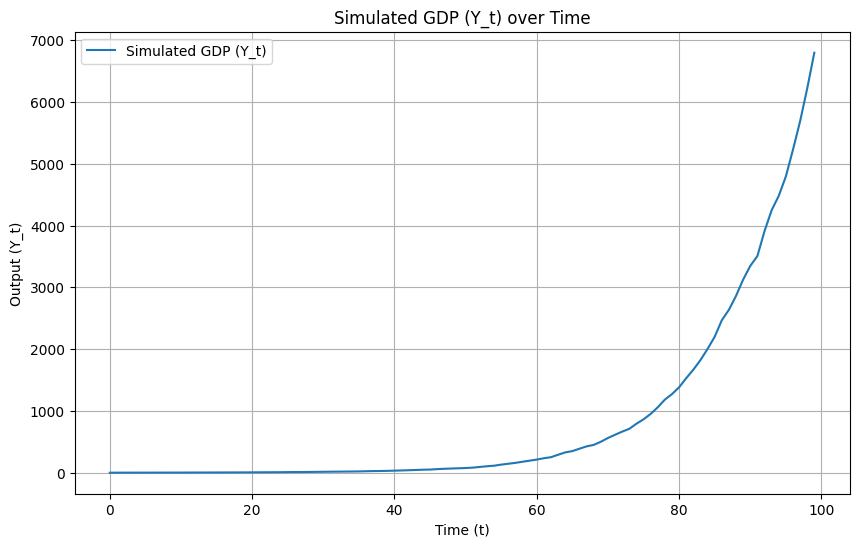

In [11]:
#5d
alpha = 0.33
s = 0.3
delta = 0.05
gamma = 0.02
T = 100
shock_std = 0.02
A = np.zeros(T)
K = np.zeros(T)
H = np.zeros(T)
Y = np.zeros(T)
K[0] = 1
H[0] = 1
A[0] = 1
for t in range(1, T):
    A[t] = A[t-1] * (1 + np.random.normal(0, shock_std))
    K[t] = K[t-1] + s * K[t-1] - delta * K[t-1]
    H[t] = H[t-1] * (1 + gamma)
    Y[t] = A[t] * K[t]**alpha * (H[t])**(1 - alpha)
plt.figure(figsize=(10, 6))
plt.plot(range(T), Y, label="Simulated GDP (Y_t)")
plt.title('Simulated GDP (Y_t) over Time')
plt.xlabel('Time (t)')
plt.ylabel('Output (Y_t)')
plt.legend()
plt.grid(True)
plt.show()


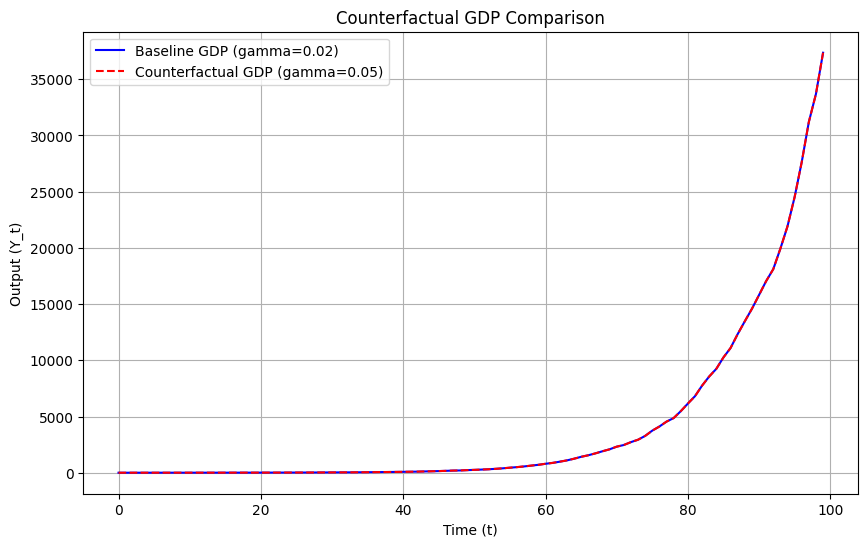

In [12]:
#5e
gamma_new = 0.05
H_new = np.zeros(T)
H_new[0] = 1
for t in range(1, T):
    A[t] = A[t-1] * (1 + np.random.normal(0, shock_std))
    K[t] = K[t-1] + s * K[t-1] - delta * K[t-1]
    H_new[t] = H_new[t-1] * (1 + gamma_new)
    Y[t] = A[t] * K[t]**alpha * (H_new[t])**(1 - alpha)
plt.figure(figsize=(10, 6))
plt.plot(range(T), Y, label="Baseline GDP (gamma=0.02)", color='b')
plt.plot(range(T), Y, label="Counterfactual GDP (gamma=0.05)", color='r', linestyle='dashed')
plt.title('Counterfactual GDP Comparison')
plt.xlabel('Time (t)')
plt.ylabel('Output (Y_t)')
plt.legend()
plt.grid(True)
plt.show()

